<a href="https://colab.research.google.com/github/TANZID36/Loan-Status-Prediction/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
#loading dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/drive/MyDrive/csv files for colab/loan_status.csv')

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
#number of missing values
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#replacing null values with mean values in numerical column is imputation
#inputation is not an option here because most of the null values here are from categorical column

#dropping the missing values
loan_dataset = loan_dataset.dropna()

In [9]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
#label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)

In [11]:
#converting categorical column to numerical values, encoding
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}}, inplace=True)

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [12]:
#Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#replacing the 3+ values with 4 for the model to understand better
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [14]:
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization for better understanding of the data

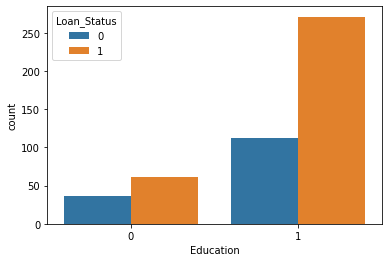

In [15]:
#education and loan status
sns.countplot(x='Education', hue='Loan_Status', data=loan_dataset)

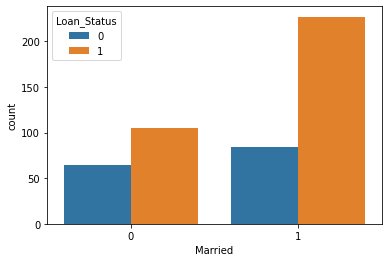

In [16]:
#martial status and loan status
sns.countplot(x='Married', hue='Loan_Status', data=loan_dataset)

Seperating Features and Label

In [17]:
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = loan_dataset['Loan_Status']

Splitting the data into train and test

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, stratify=Y, random_state=2)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the Model using SVM

In [20]:
classifier = svm.SVC(kernel='linear')

In [21]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [22]:
#accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print('Accuracy score of the training data : ',training_data_accuracy)

Accuracy score of the training data :  0.7986111111111112


In [23]:
#accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of the training data : ',test_data_accuracy)

Accuracy score of the training data :  0.8333333333333334


Making a Predictive System

In [24]:
#input data taken randomly
#input = LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
input_data = (1,1,0,0,0,2333,1516,95,360,1,2)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
if(prediction[0]==1):
  print('This person has a Loan to his name')
else:
  print('This person does not have a Loan to his name')

This person has a Loan to his name


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
